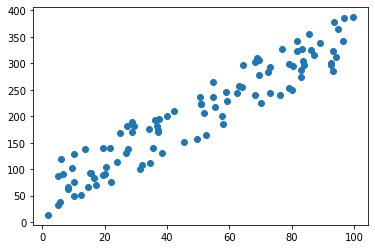

In [313]:
import numpy as np;
import matplotlib.pyplot as plot
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from commons.common import setXY
#生成一个 3x+4附近的点
#np.random.seed(100);
# 获取randc个随机点
randc=100
# 0-1的数*多少倍，注意太小的样本点，abs(f(w=w, X=X) - f(w=last_w, X=X)) 的值增量过小可能导致循环次数后，还没有到<epsilon导致拟合不准确
# 如果是1，建议循环次数加大100000
# 如果是100 可以设置为100
blow=100
x1=np.random.rand(randc)*blow;
x2=x1*3+4+np.random.rand(randc)*blow;
plot.plot(x1,x2,"o");
X=np.hstack((x1.reshape(len(x1),1),x2.reshape(len(x2),1)))
np.set_printoptions(suppress=True) #不使用科学计数法

#或者简化写法
# X = np.empty((randc, 2))
# X[:, 0] = np.random.uniform(0., blow, size=randc)
# X[:, 1] = 3 * X[:, 0] +4 + np.random.normal(0, 10, size=100)

def demean(X):
    return X-np.mean(X,axis=0) #取对应列的均值

In [314]:
#均值归零的算法是x1-xmean，x2-x2mean
X_demean=demean(X)




精度： 9.747964213602245e-09 1e-08
梯度 [ 5558.57388855 18988.72160746]
[0.28094096 0.95972505]


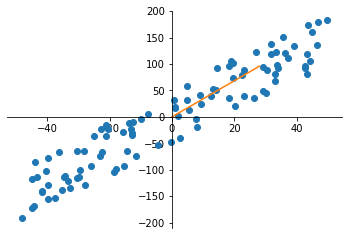

In [315]:
# 这是目标函数 np.sum（（X*W）**2)/M
def f(X,w):
    return np.sum((X.dot(w))**2)/len(X)
# 获取各个维度的导数    
def df_w(X,w):
    return X.T.dot(X.dot(w))*2/len(X)
# 将任意向量转换为单位向量 np.linalg.norm(w)是 x**2+x1**2开根号
# (3,4)/5=(3/5,4/5)就是单位向量，模是1
def direction(w):
    return w / np.linalg.norm(w)
'''
通用计算某个点的斜率的方法
为了验证我们的这个是正确的，使用这个df_debug这个函数，
和线性下降法一样，使两个点之间连成的直线不断的靠近应得的直线，
使其斜率相当，注意的是，这里的epsilon取值比较小，是因为在PCA的梯度上升法中，
w是一个方向向量，其模为1，所以w的每一个维度其实都很小，那么为了适应，相应的epsilon也要小一些
'''
def df_debug(w,X,epsilon=0.0001):
      res = np.empty(len(w))
      for i in range(len(w)):
          w_1 = w.copy()
          w_1[i] += epsilon
          w_2 = w.copy()
          w_2[i] -= epsilon
          res[i] = (f(w=w_1,X=X) - f(w=w_2,X=X)) / (2*epsilon)
      return res
i_w=np.random.random(X.shape[1])
wapp=np.array([])
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    i_iter = 1
    global wapp
    wapp=np.append(wapp,w).reshape((1,len(w)))
    while i_iter < n_iters:
        gradient = df(w=w, X=X)
        last_w = w
        # gradient是对每个维度求偏导得到的列表，如果偏导数为负则w的这个维度加上一个负值，降维后的方差趋于变大
        # 如果偏导数为正，则w的这个维度加上一个正值，降维后的方差趋于变大，因此w加上导数值，降维后的方差趋于变大
        # 在eta合适的情况下，随着循环进行，导数值逐渐趋近0，eta是常数，降维后的方差的变化量会越来越小
        w = w + eta * gradient
        w = direction(w)  # 注意1，每次求一个单位向量
        wapp=np.vstack((wapp,np.array([w])))
        # abs求绝对值
        if (abs(f(w=w, X=X) - f(w=last_w, X=X)) < epsilon):
            print("精度：",abs(f(w=w, X=X) - f(w=last_w, X=X)),epsilon)
            print("梯度",gradient)
            
            break
        i_iter += 1
    return w


initial_w = np.random.random(X.shape[1])  # 注意2：不能用0向量开始
eta = 0.0001
# print(gradient_ascent(df_debug, X=X_demean, initial_w=initial_w, eta=eta))
w=(gradient_ascent(df_w, X=X_demean, initial_w=initial_w, eta=eta, n_iters=100))
setXY()
plot.plot(X_demean[:,0],X_demean[:,1],"o");
print(w)
# 单位向量乘同一个，方向是相同的
plot.plot([0,w[0]*(blow)],[0,w[1]*blow])
#plot.plot(X_demean[:,0],w[1]/w[0]*X_demean[:,0])

[0.6364501  0.41685128 0.32839041 0.29721733 0.28650086 0.28283777
 0.28158767 0.28116127 0.28101586 0.28096627 0.28094936 0.28094359
 0.28094163 0.28094096]
[0.77131788 0.9089747  0.94454208 0.95480985 0.95807998 0.95916776
 0.9595355  0.95966053 0.95970312 0.95971764 0.95972259 0.95972428
 0.95972486 0.95972505]
[44278.86112271889, 52405.0968393111, 53774.69852165995, 54024.0069751348, 54082.63693341735, 54099.53980077365, 54104.943817947824, 54106.744734633314, 54107.35398376301, 54107.561173541006, 54107.631760124656, 54107.65582273787, 54107.66402728233, 54107.66682495699]


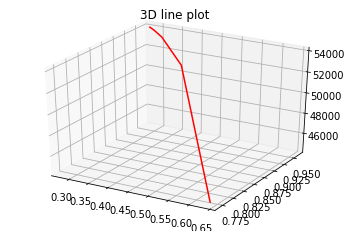

In [321]:
fig = plot.figure()
#创建梯度上升的过程
ax = plot.axes(projection='3d')
wappy=[f(w=w_t, X=X) for w_t in wapp]
ax.plot3D(wapp[:,0],wapp[:,1],wappy, 'red')
print("w1值",wapp[:,0])
print("w2值",wapp[:,1])
print("方差：",wappy)

ax.set_title('3D line plot')
plot.show()

